In [1]:
import numpy as np
import cv2
import glob
import os
import pickle
import time

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from sklearn.svm import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from scipy.ndimage.measurements import label

%matplotlib inline

In [11]:
data_path = './data/'
const = {
    'vehicles_data' : os.path.join(data_path, 'vehicles/'),
    'non_vehicles_data' : os.path.join(data_path, 'non-vehicles/'),
    'test_images' : './test_images',
    'project_video' : './project_video.mp4',
    'test_video' : './test_video.mp4'
}

### Data Load and Exploration

In [18]:
def load_images(path):
    imgs_paths = []
    imgs = []
    
    for d in os.listdir(path):
        dir_path = os.path.join(path, d)    
        imgs_paths.extend(glob.glob(os.path.join(dir_path, '*.png')))
    
    
    for path in imgs_paths:
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        imgs.append(img)
    
    return np.asarray(imgs)
    
vehicle_imgs = load_images(const['vehicles_data'])   
non_vehicle_imgs = load_images(const['non_vehicles_data'])   

8792 images in vehicles data set
8968 images in non-vehicles in data set


dataset: vechicles
number of data points: 8792
shape of each point: (64, 64, 3)
data stored in: <class 'numpy.ndarray'>
10 randomly seleted samples:


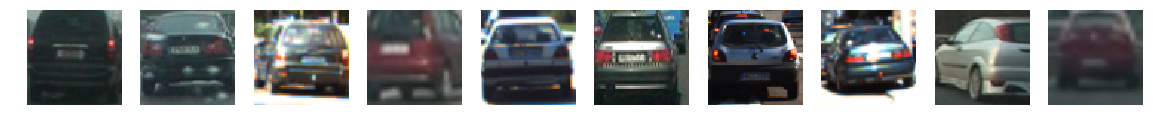

dataset: non vechicles
number of data points: 8968
shape of each point: (64, 64, 3)
data stored in: <class 'numpy.ndarray'>
10 randomly seleted samples:


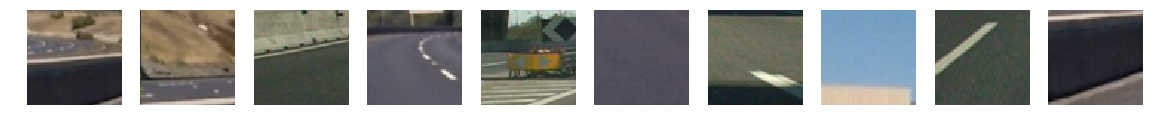

In [41]:
def exploratory_analysis(data, dataset_name=None, seed=13, sample_size=10):
    np.random.seed(seed)
    print('dataset:', dataset_name)
    print('number of data points:', data.shape[0])
    print('shape of each point:', data.shape[1:])
    print('data stored in:', type(data))
    print('{} randomly seleted samples:'.format(sample_size))
    sample_idx = np.random.randint(0, high=data.shape[0]-1, size=sample_size)
    f, ax = plt.subplots(1, sample_size, figsize=(20, 10*sample_size))
    for i, idx in enumerate(sample_idx):
        img = data[idx]
        ax[i].imshow(img)
        ax[i].axis('off')
    plt.show()
    
exploratory_analysis(vehicle_imgs, dataset_name='vechicles')
exploratory_analysis(non_vehicle_imgs, dataset_name='non vechicles')

### Feature Extraction